In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ray
from ray.rllib.algorithms.algorithm import Algorithm

from esc.epanet_env import EPANETEnv


In [2]:
ray.init()

2022-11-30 23:52:13,422	INFO worker.py:1528 -- Started a local Ray instance.


Python version:,3.10.7
Ray version:,2.1.0


In [3]:
algo = Algorithm.from_checkpoint('/Users/maxdumas/ray_results/PPO_EPANETEnv_2022-11-30_23-47-01yu4klmmp/checkpoint_000001')

2022-11-30 23:52:14,434	WARNING deprecation.py:47 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!
2022-11-30 23:52:14,437	WARNING algorithm.py:2531 -- You have specified 1 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with each call to `Algorithm.train()`. Instead, you will have to call `Algorithm.evaluate()` manually in order to trigger an evaluation run.
2022-11-30 23:52:14,438	WARNING ppo.py:351 -- `train_batch_size` (4000) cannot be achieved with your other settings (num_workers=9 num_envs_per_worker=1 rollout_fragment_length=445)! Auto-adjusting `rollout_fragment_length` to 445.
2022-11-30 23:52:14,438	INFO ppo.py:379 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't work for you.
2022-11-30 23:52:14,441	INFO algorithm.py:457 -- Current log_level is ERROR. For more in

(RolloutWorker pid=28234) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=28234) Input File BUILDING.inp loaded successfully.
(RolloutWorker pid=28234) 
(RolloutWorker pid=28230) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=28230) Input File BUILDING.inp loaded successfully.
(RolloutWorker pid=28230) 
(RolloutWorker pid=28228) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=28228) Input File BUILDING.inp loaded successfully.
(RolloutWorker pid=28228) 
(RolloutWorker pid=28229) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=28229) Input File BUILDING.inp loaded successfully.
(RolloutWorker pid=28229) 
(RolloutWorker pid=28232) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=28232) Input File BUILDING.inp loaded successfully.
(RolloutWorker pid=28232) 
(RolloutWorker pid=28231) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=28231) Input File BUILDING.inp load

2022-11-30 23:52:20,622	WARNING util.py:66 -- Install gputil for GPU system monitoring.


(RolloutWorker pid=28283) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=28283) Input File BUILDING.inp loaded successfully.
(RolloutWorker pid=28283) 


In [4]:
env = EPANETEnv({})
obs = env.reset()
done = False
R = []
T = []
E = []

while not done:
    action = algo.compute_single_action(obs)
    print(action)
    obs, reward, done, _ = env.step(action)
    tank_head = obs[-2]
    E.append(obs[9] * action)
    T.append(tank_head)
    R.append(reward)

algo.stop()

EPANET version 20200 loaded (EPyT version 1.0.1).
Input File BUILDING.inp loaded successfully.

0
0
1
1
0
0
1
0
1
0
1
1
0
0
1
1
1
1
0
1
1
1
1
1
0
0
1
0
1
1
1
0
0
0
1
1
0
1
0
1
1
1
0
0
0
1
1
1
0
1
0
1
0
0
1
0
1
0
0
1
1
0
1
0
1
1
0
1
1
0
1
1
1
1
0
0
1
0
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
1
0
0
1
0
0
0
1
1
1
0
0
1
0
1
0
0
0
1
1
0
1
1
1
1
1
1
1
1
1
1
0
0
1
1
0
0
1
0
1
0
0
0
0
0
0
1
1
0
0
0
0
1
0
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
1
0
0
0
0
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
0
0
0
1
1
1
0
1
1
1
0
1
0
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
0
1
1
0
0
1
1
1
1
1
1
1
1
0
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
0
1
1
1
1
0
1
1
1
0
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1


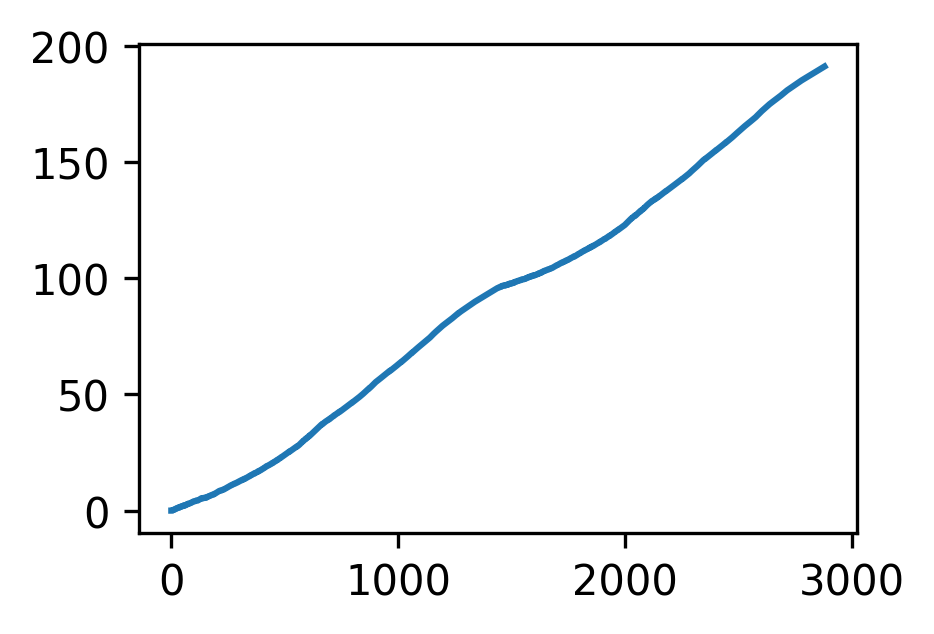

In [9]:
plt.plot(np.arange(2880), np.cumsum(E[:2880]))

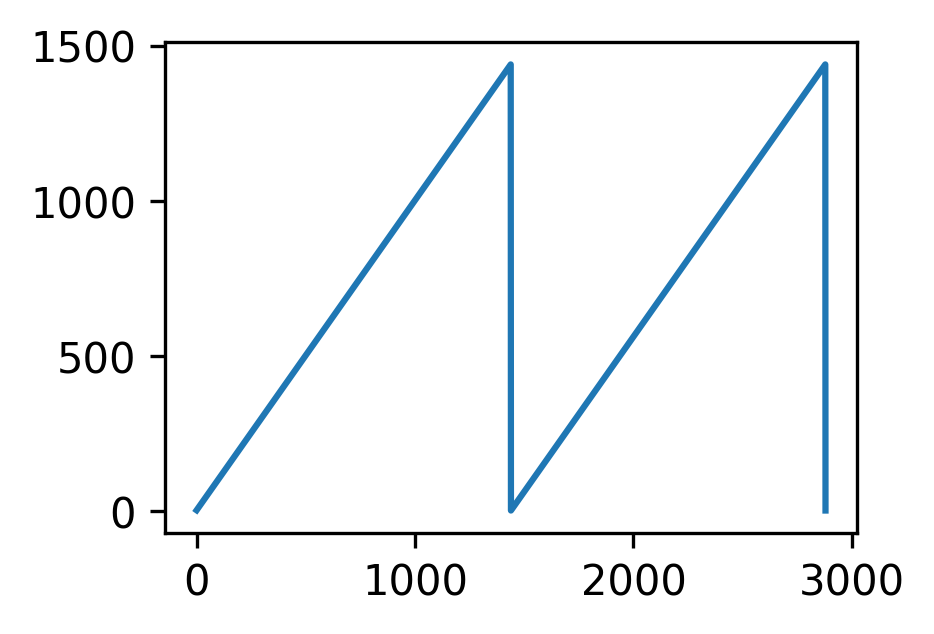

In [7]:
plt.plot(np.arange(2880), T[:2880])

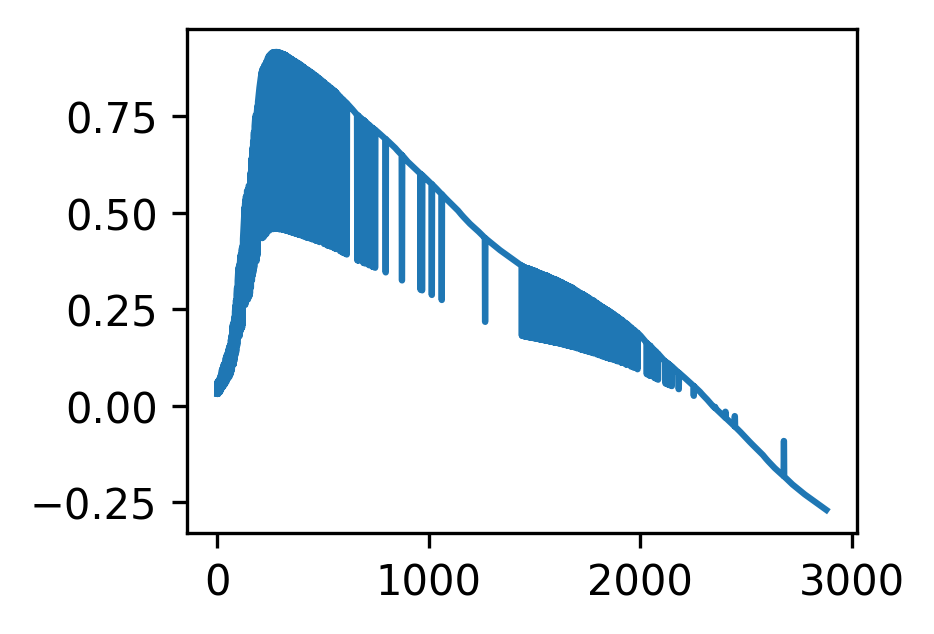

In [8]:
plt.plot(np.arange(2880), R[:2880])